In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
from sklearn import datasets

In [2]:
drinking_file = "Resources/drinkingwater.csv"
sani_file = "Resources/sanitization.csv"
life_file = "Resources/lifeexpectancy.csv"
hale_file = "Resources/halelife.csv"

In [3]:
drinking_data = pd.read_csv(drinking_file)
sani_data = pd.read_csv(sani_file)
life_data = pd.read_csv(life_file)
hale_data = pd.read_csv(hale_file)

In [4]:
# display drinking_data for preview
drinking_data

,Location,Period,Population using at least basic drinking-water services (%)
0,Afghanistan,2017,57.3
1,Afghanistan,2016,54.8
2,Afghanistan,2015,52.4
3,Afghanistan,2014,50.0
4,Afghanistan,2013,47.6
...,...,...,...
3450,Zimbabwe,2004,57.9
3451,Zimbabwe,2003,58.6
3452,Zimbabwe,2002,59.2
3453,Zimbabwe,2001,59.9


In [5]:
# rename column head "Population using at least basic drinking-water services (%)" to "Percentage" for drinking water data
drinking_df= drinking_data.rename(columns={"Population using at least basic drinking-water services (%)":"Percentage"})
drinking_df.head()

,Location,Period,Percentage
0,Afghanistan,2017,57.3
1,Afghanistan,2016,54.8
2,Afghanistan,2015,52.4
3,Afghanistan,2014,50.0
4,Afghanistan,2013,47.6


In [6]:
# sort dataframe by country for drinking water 
display(drinking_df.sort_values(['Location'], ascending=True))

,Location,Period,Percentage
0,Afghanistan,2017,57.3
17,Afghanistan,2000,21.6
16,Afghanistan,2001,21.6
15,Afghanistan,2002,23.6
14,Afghanistan,2003,25.6
...,...,...,...
3438,Zimbabwe,2016,50.4
3437,Zimbabwe,2017,49.8
3453,Zimbabwe,2001,59.9
3444,Zimbabwe,2010,54.1


In [7]:
len(drinking_data["Location"].unique())

195

In [8]:
# count number of countries in the dataframe
drinking_data['Location'].value_counts()

Thailand              18
Viet Nam              18
Greece                18
Hungary               18
Denmark               18
                      ..
Poland                13
Montenegro            12
Sudan (until 2011)    11
South Sudan            7
Sudan                  7
Name: Location, Length: 195, dtype: int64

In [9]:
# get data of countries insterested for drining water
target_countries = pd.DataFrame(drinking_df.query("Location == ['Switzerland', 'Canada', 'Japan', 'Germany', 'Australia', 'UK & N.Ireland', 'US', 'Liberia', 'Nigeria', 'Madagascar']"))
target_countries

,Location,Period,Percentage
144,Australia,2017,100.0
145,Australia,2016,100.0
146,Australia,2015,100.0
147,Australia,2014,100.0
148,Australia,2013,100.0
...,...,...,...
3306,US,2004,99.8
3307,US,2003,99.8
3308,US,2002,99.8
3309,US,2001,99.8


In [10]:
# get data of years 2000 and 2010 for drinking water
year_2000 = pd.DataFrame(target_countries.query("Period == '2000'"))
year_2010 = pd.DataFrame(target_countries.query("Period == '2010'"))

years = [year_2000,year_2010]

for year in years:
    display(year.sort_values(['Percentage'], ascending=True))

,Location,Period,Percentage
1201,Madagascar,2000,23.8
1551,Nigeria,2000,34.9
1191,Liberia,2000,49.5
161,Canada,2000,98.2
575,Japan,2000,98.5
151,Australia,2000,99.1
1759,US,2000,99.8
565,Germany,2000,100.0
1561,Switzerland,2000,100.0
1749,UK & N.Ireland,2000,100.0


,Location,Period,Percentage
3007,Madagascar,2010,31.0
3264,Nigeria,2010,47.0
2997,Liberia,2010,57.7
3310,US,2010,97.0
1831,Canada,2010,98.5
2256,Japan,2010,98.7
1821,Australia,2010,99.7
2246,Germany,2010,100.0
3274,Switzerland,2010,100.0
3300,UK & N.Ireland,2010,100.0


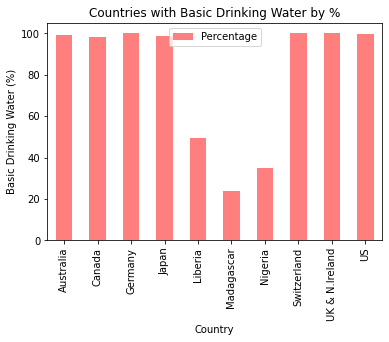

In [11]:
# Year 2000 bar chart of targeted countries' basic drinking services %
year_2000_bar = year_2000.plot.bar('Location', 'Percentage', color = 'red', alpha = 0.5)
    # alpha gives the shade of the color, ranging between 0-1

plt.title('Countries with Basic Drinking Water by %')
plt.xlabel("Country")
plt.ylabel("Basic Drinking Water (%)")

plt.savefig("My Project Images/2000 Countries with Basic Drinking Water.png", bbox_inches ="tight")

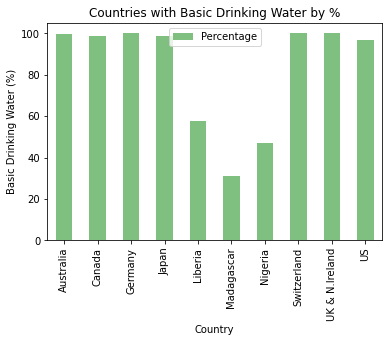

In [12]:
# Year 2010 bar chart of targeted countries' basic drinking services %
year_2010_bar = year_2010.plot.bar('Location', 'Percentage', color = 'green', alpha = 0.5)
    # alpha gives the shade of the color, ranging between 0-1

plt.title('Countries with Basic Drinking Water by %')
plt.xlabel("Country")
plt.ylabel("Basic Drinking Water (%)")

plt.savefig("My Project Images/2010 Countries with Basic Drinking Water.png", bbox_inches ="tight")

In [13]:
# print out countries of target
countries = target_countries['Location'].unique()
countries

array(['Australia', 'Canada', 'Germany', 'Japan', 'Liberia', 'Madagascar',
       'Nigeria', 'Switzerland', 'UK & N.Ireland', 'US'], dtype=object)

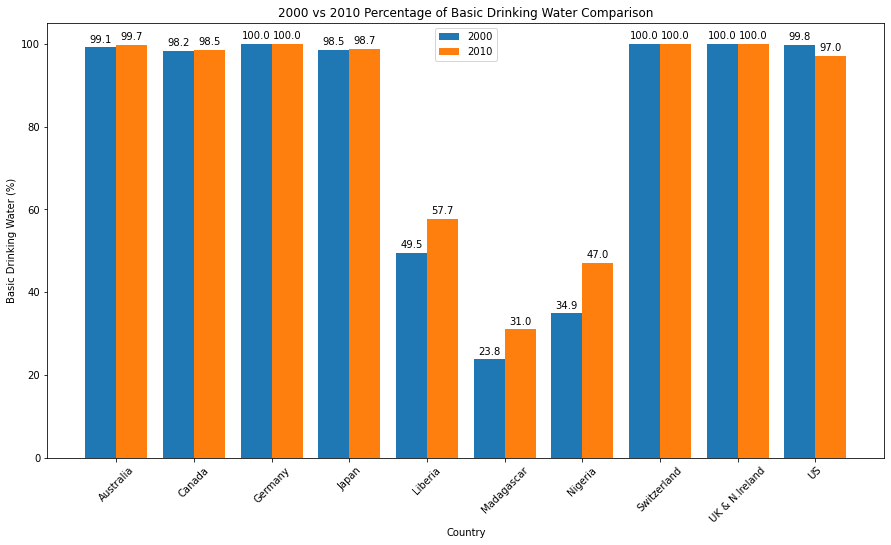

In [14]:
# create a chart combining 2000 and 2010 bar charts for easier comparison of the two years

labels = countries
y = year_2000.Percentage
z = year_2010.Percentage

x = np.arange(len(labels))  # the label locations
width = 0.4  # the width of the bars

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot()  # fig, ax = plt.subplots() -- this code makes the chart size not changeable 

rects1 = ax.bar(x - width/2, y, width, label='2000')
rects2 = ax.bar(x + width/2, z, width, label='2010')

# Add labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Country')
ax.set_ylabel('Basic Drinking Water (%)')
ax.set_title('2000 vs 2010 Percentage of Basic Drinking Water Comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation = 45)
ax.legend()

# Attach percentages above each bar in *rects*, displaying its height.
def autolabel(rects):
    
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.savefig("My Project Images/2000 vs 2010 Percentage of Basic Drinking Water Comparison.png", bbox_inches ="tight")
plt.show()

# Resource: https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py

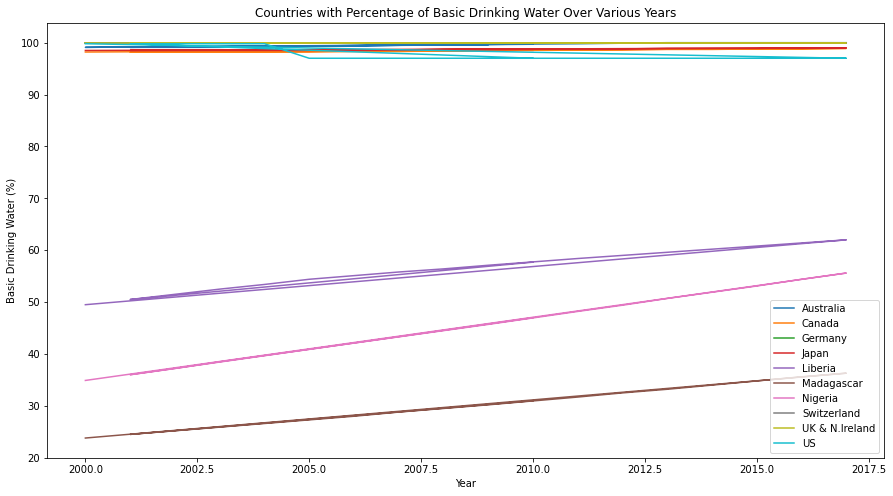

In [15]:
# get line chart to compare countries' drinking water over various years

plt.figure(figsize=(15,8)) 

for country in countries:
    df = target_countries[target_countries['Location']==country]
    plt.plot(df['Period'],df['Percentage'],label=country)

plt.title('Countries with Percentage of Basic Drinking Water Over Various Years')
plt.xlabel("Year")
plt.ylabel('Basic Drinking Water (%)')
plt.legend()

plt.savefig('My Project Images/Countries with Percentage of Basic Drinking Water Over Various Years.png', bbox_inches = 'tight')
plt.show() # plt.show()--needs to be after plt.savefig()